# Lab4 - NFL clustering
Author: **_YOUR NAME HERE_**


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 0. Function definitions

In [7]:
def add_column_to_dataframe(X, col_vector, col_name, col_type='category'):
    '''Adds a column to DataFrame.
        
        This function does not alter the input DataFrame.
        It creates a copy.
    
        X (pandas.DataFrame): DataFrame to add column to
        col_vector (pandas.Series or numpy.array): Array of values to be added
        col_name (str): Name of the new column
        col_type : valid DataFrame element type
        
        returns: copy of X with new column
    '''
    #TODO: Implement function here (see lecture code)
    X[col_name] = col_vector
    X[col_name] = X[col_name].astype(col_type)
    return X
    

In [8]:
from collections import Counter

def plot_cluster_proportions(labels):
    '''Plot cluster proportions as pie plot.
    
        labels (list, numpy.array, pandas.Series): Vector of labels indicating clusters.
        
        returns collections.Counter object with label counts
    '''
    
    #TODO: Implement function here (see lecture code)
    counts = Counter(labels)
    fig1, ax1 = plt.subplots()
    ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal');  
    ax1.set_title('Cluster size distribution');
    return counts
    
    

In [9]:
def plot_cluster_centers(centers, title='Cluster centers per feature on standard scale'):
    '''Plots center means of each cluster as bar-plots 
    
        centers (pandas.DataFrame): Cluster center averages, 
                                    centers.shape = (n_clusters, n_features)
        title (str): Plot title
    
    '''
    
    #TODO: Implement function here (see lecture code)

    f, axes = plt.subplots(centers.shape[0], 1, figsize=(6, 6), sharex=True)

    for i, ax in enumerate(axes):
        center = centers.loc[i, :]
        maxPC = 1.01 * np.max(np.max(np.abs(center)))
        colors = ['C0' if l>0 else 'C1' for l in center]
        ax.axhline(color='#888888')
        center.plot.bar(ax=ax, color=colors)
        ax.set_ylabel(f'Cluster{i}')
        ax.set_ylim(-maxPC, maxPC)
        if i == 0:
            ax.set_title(title)
    

## 1. Load dataset

Load the NFL dataset into variables `X` and `y` (we do not need `y`).  
https://www.scikit-yb.org/en/latest/api/datasets/nfl.html

Keep the following features `'Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate'` for rows where `'Tgt'>=20`.

Print the shape of X.

In [10]:
#TODO add your code

from yellowbrick.datasets import load_nfl

X_parent,y = load_nfl(data_home=None, return_dataset=False)
X_parent = X_parent.drop(X_parent[X_parent.Tgt < 20].index)
X = X_parent[['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']]

type(X)
print(X.shape)
print("\n")
print(X.head())



(260, 5)


   Rec   Yds  TD  Fmb  Ctch_Rate
0  125  1405   9    2      0.850
1  116  1163   8    1      0.744
2  115  1572  11    2      0.706
3  113  1677   8    2      0.665
4  113  1373   9    1      0.739


## 2. Scale the dataset with `StandardScaler`

Create a pandas DataFrame in a variable called `X_scaled`, that holds the values of `X` scaled with a `StandardScaler()`.

Column names of `X_scaled` should match `X`.

Print head of `X` and `X_scaled`.

In [11]:
#TODO add your code
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()
scaler = StandardScaler()
scaler.fit(X_scaled)
X_scaled = pd.DataFrame(scaler.transform(X_scaled), columns=X_scaled.columns)

print('--- X.head() ---')
print(X.head())

print('\n--- X_scaled.head() ---')
print(X_scaled.head())


--- X.head() ---
   Rec   Yds  TD  Fmb  Ctch_Rate
0  125  1405   9    2      0.850
1  116  1163   8    1      0.744
2  115  1572  11    2      0.706
3  113  1677   8    2      0.665
4  113  1373   9    1      0.739

--- X_scaled.head() ---
        Rec       Yds        TD       Fmb  Ctch_Rate
0  3.447289  2.871321  2.239894  1.017440   1.691943
1  3.083106  2.136636  1.869899  0.126752   0.700260
2  3.042641  3.378314  2.979884  1.017440   0.344750
3  2.961711  3.697083  1.869899  1.017440  -0.038825
4  2.961711  2.774172  2.239894  0.126752   0.653482


## 3. Find the number of clusters with the Elbow method 

Use `yellowbrick.cluster.elbow.kelbow_visualizer()` and `KMeans(random_state=54)` to create  an Elbow plot using the metric `'distortion'`, the scaled data in `X_scaled` for cluster sizes from 2 to 10.

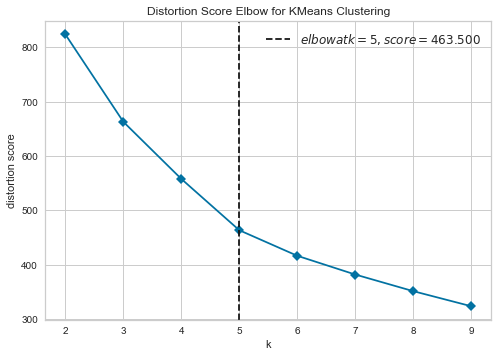

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002546AA9CA90>,
                 k=None, model=None, timings=False)

In [12]:
#TODO add your code
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=54), X_scaled, k=(2,10), metric='distortion', timings=False)

In [14]:
# This will reset the color styles to the orginal (seaborn) styles
from yellowbrick.style.rcmod import reset_orig
reset_orig()

## 4. KMeans clustering with 5 clusters
Use `KMeans` and `random_state=54` to cluster the data in `X_scaled` in to 5 clusters.

In [15]:
#TODO add your code
kmeans = KMeans(n_clusters=5, random_state=54)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=54)

Add the cluster labels as a column `'clusters'` to `X` with `add_column_to_dataframe()`. 

Print the new `X`.

We will use this column to color the pair-plot.

In [16]:
#TODO add your code
X = add_column_to_dataframe(X, kmeans.labels_, 'clusters', 'category')
print(X)

     Rec   Yds  TD  Fmb  Ctch_Rate clusters
0    125  1405   9    2      0.850        1
1    116  1163   8    1      0.744        1
2    115  1572  11    2      0.706        1
3    113  1677   8    2      0.665        1
4    113  1373   9    1      0.739        1
..   ...   ...  ..  ...        ...      ...
266   12   164   3    0      0.480        4
275   11    80   1    0      0.458        4
277   11   136   1    0      0.478        4
284   10   100   1    0      0.417        4
302    9   100   3    0      0.450        4

[260 rows x 6 columns]


Create a pandas DataFrame with the cluster centers and the same column names as `X_scaled`. 

Print the DataFrame. 

We will use this DataFrame to plot the cluster centers.

In [18]:
#TODO add your code
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
centers_df

,Rec,Yds,TD,Fmb,Ctch_Rate
0,0.467771,0.532391,0.536828,-0.109019,-0.160447
1,2.123753,2.311832,2.101146,0.200976,0.156471
2,0.352797,0.050820,-0.291652,2.517545,0.833699
3,-0.488875,-0.636830,-0.552689,-0.276178,0.750156
4,-0.744863,-0.602437,-0.537916,-0.339147,-1.103050


## 5. Visualize clusters - Pair-plots
Use a seaborn pairplot to plot columns in `X`, using `clusters` column as `hue`.

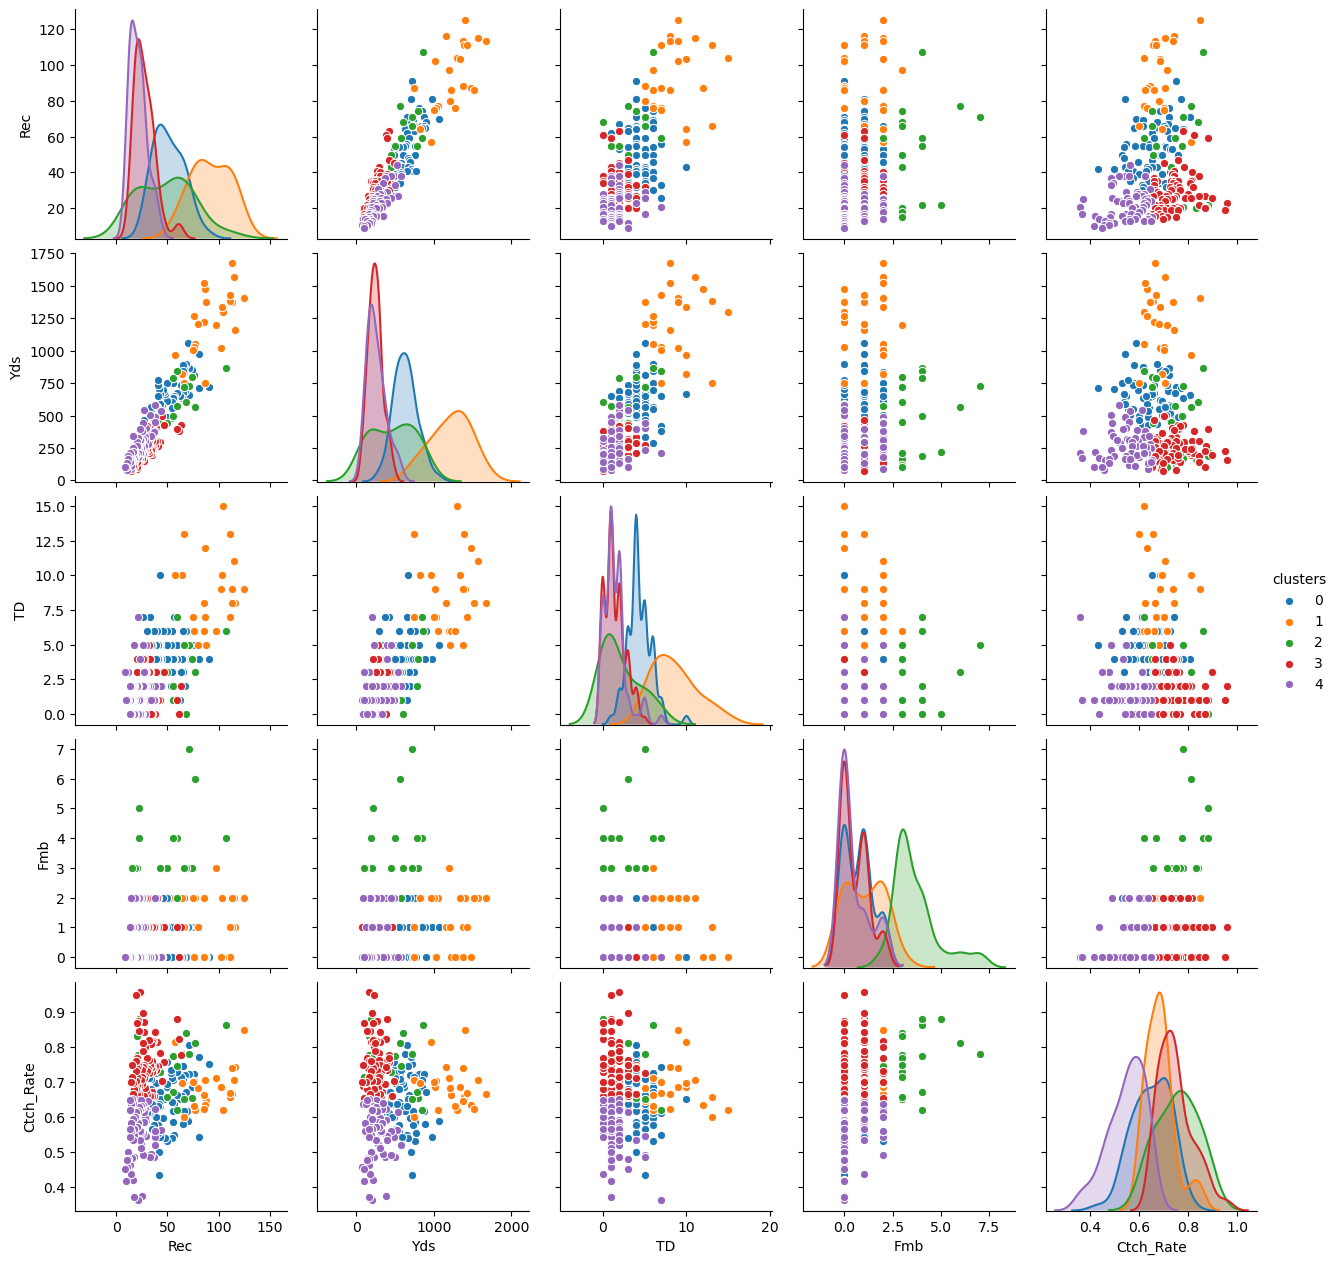

In [19]:
#TODO add your code
sns.pairplot(X,hue='clusters')

## 6. Interpret clusters

### 6.1 Plot cluster proportions 
Use the function `plot_cluster_proportions()` to plot the cluster proportions of the `'clusters'` column in `X`.

Print the cluster counts returned by the function.

Counter({1: 24, 2: 19, 0: 68, 3: 84, 4: 65})

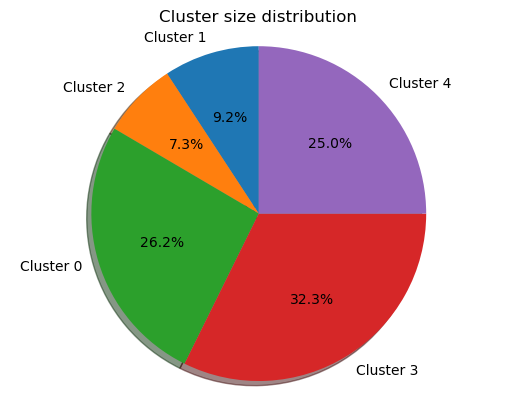

In [20]:
#TODO add your code
a=[]
for row in X.itertuples():
    a.append(row[6])
    
cluster_arr = np.array(a)


plot_cluster_proportions(cluster_arr)


### 6.2 Plot cluster means

Use `plot_cluster_centers()` to plot the scaled cluster centers (DataFrame prepared in Step 4.)

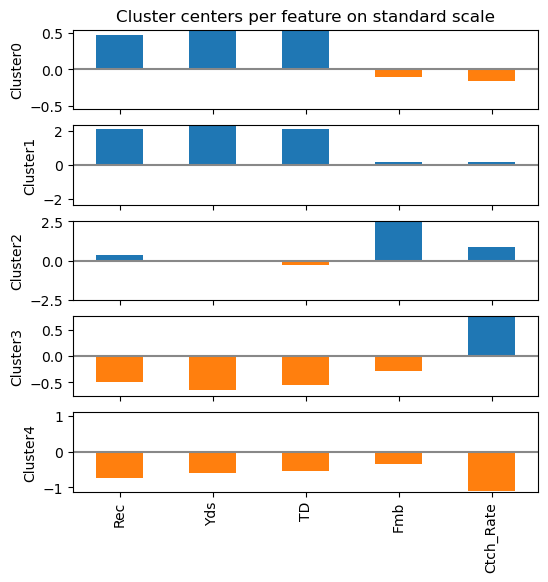

In [21]:
#TODO add your code
plot_cluster_centers(centers_df)

## 7. Conclusion

Provide interpretations of the five clusters based on the cluster center plot in Step 6.2.

Interpretations should comment on larger than average and lower than average values. Maybe it is possible to give the cluster a representative name.

For example, noticing that high values of `'Rec', 'Yds', 'TD'` could mean the player ontributes strongly to a teams win. Further more, hugh fumbling `'Fmb'` and low catch rate `'Ctch_Rate'` might *not* contribute to a teams win. With this in mind which cluster represents high, average and low performing receivers?

**YOUR INTERPRETATIONS HERE**

Cluster 0: higher values of 'Rec', 'Yds', 'TD' shows that the cluster has players that rceived more, covered more distance, and more touch down scored. They also have lower fumble rate, but lower catching rate. Overakll the cluster performs good but has less catching accuracy.

Cluster 1: Higher values of 'Rec', 'Yds', 'TD' shows that the cluster has players that rceived more, covered more distance, and more touch down scored.They also have higher catching rate which says that they are good performers but they also have higher fumbling rate which makes them less competitive. Overakll the cluster performs good but fumblers a lot.

Cluster 2: Has positive reception value but it is very low. Yds is zero and low TD. They fumble a lot too. Hence although they have a higher catching accuracy they are very poor  performers.

Cluster 3: Have very low REC, TD, Yds and fmbl rate. Thid shows that this cluster does not perform very well even though they have a very high catching accuracy.

Cluster 4: This cluster is the worst. All of their scores are very low. Hence, even though they have a lower fumbling rate, they perfiorm very poorly

## Reflection

**YOUR REFLECTION HERE**
This Lab was quite difficult for me to finish, firstly because I was very behind on my lecture materials because of my fulltime work. I was also supposed to go back home but due to some uncalled situartions I was sent back from Dubai to Canada. Amidst all the chaos being able to fully understand and finish the lab was a challenge but our klectures are so well structured that it is almost impossible to understand anything about this lab